# Compare the Search Behavior of Deterministic vs Stochastic activity

In [10]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure5'

if not os.path.exists(publication_figures):
    os.makedirs(publication_figures)

import _figure_parameters

# Load the data for deterministic and stochastic simulations

In [15]:
data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/DeterministicActivity']

# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames and 'ic' not in fileNames):
                files_list.append(os.path.join(dirs,fileNames))


print('No:of files: {}'.format(len(files_list)))

# Collect all data into a single data frame
df = pd.DataFrame({})

for file in files_list:
    
    df = df.append(pd.read_csv(file))
    

No:of files: 60


In [29]:
# Load the stochastic sim data

data_folders_stochastic = ['/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/NormalDistribution']

# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders_stochastic:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames and 'ic' not in fileNames):
                files_list.append(os.path.join(dirs,fileNames))


print('No:of files: {}'.format(len(files_list)))

# Collect all data into a single data frame
df_stochastic = pd.DataFrame({})

for file in files_list:
    
    df_stochastic = df_stochastic.append(pd.read_csv(file))
    

No:of files: 60


## Plot unique locations visited as percent of maximum

In [34]:
# Max no:of unique locations possible
Np = 32
b0 = 2.1
L = (Np-1)*b0
max_unique_locations = int((L)**2)

print('Max possible unique locations: {}'.format(max_unique_locations))

Max possible unique locations: 4238


In [35]:
df['Max locs percent'] = 100*df['max unique locations']/max_unique_locations
df_stochastic['Max locs percent'] = 100*df_stochastic['max unique locations']/max_unique_locations

df_subset['Max locs percent'] = 100*df_subset['max unique locations']/max_unique_locations
df_subset_stochastic['Max locs percent'] = 100*df_subset_stochastic['max unique locations']/max_unique_locations

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Plot all the data

<IPython.core.display.Javascript object>


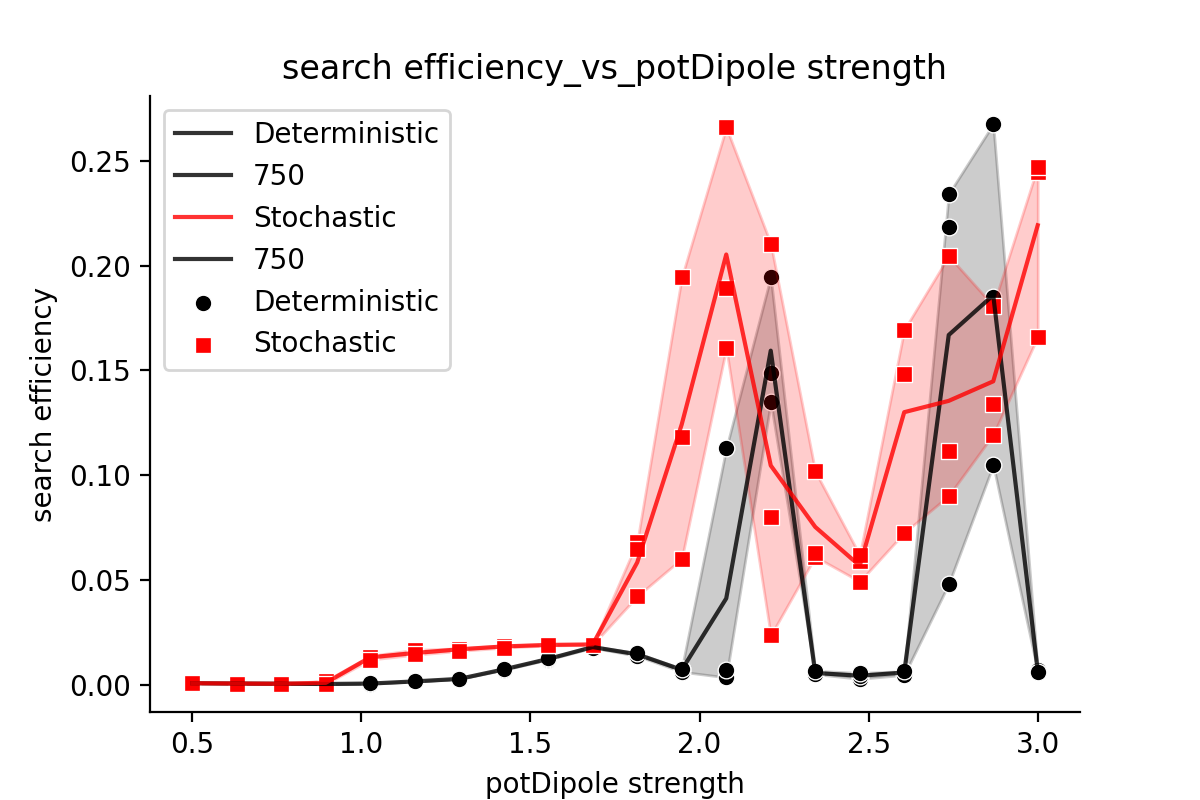

In [47]:
save = True
# y_axis = 'Max locs percent'
y_axis = 'search efficiency'

plt.style.use('default')

note = 'deterministic vs stochastic'
title = y_axis+'_vs_' +parameter
plt.figure(figsize=(6, 4))

ax1 = sns.lineplot(data=df, x= parameter, y= y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'k', alpha =0.8, label = 'Deterministic')

ax2 = sns.scatterplot(data=df, x= parameter, y=y_axis, color = 'k', label = 'Deterministic', marker = 'o')

ax3 = sns.lineplot(data=df_stochastic, x= parameter, y=y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'r', alpha =0.8, label = 'Stochastic')

ax4 = sns.scatterplot(data=df_stochastic, x= parameter, y=y_axis, color = 'r', label = 'Stochastic', marker = 's')

# ax.set_xscale('log')
plt.title(title)

sns.despine(right=True, top=True)

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()

### Plot only data where simulation was completed

<IPython.core.display.Javascript object>


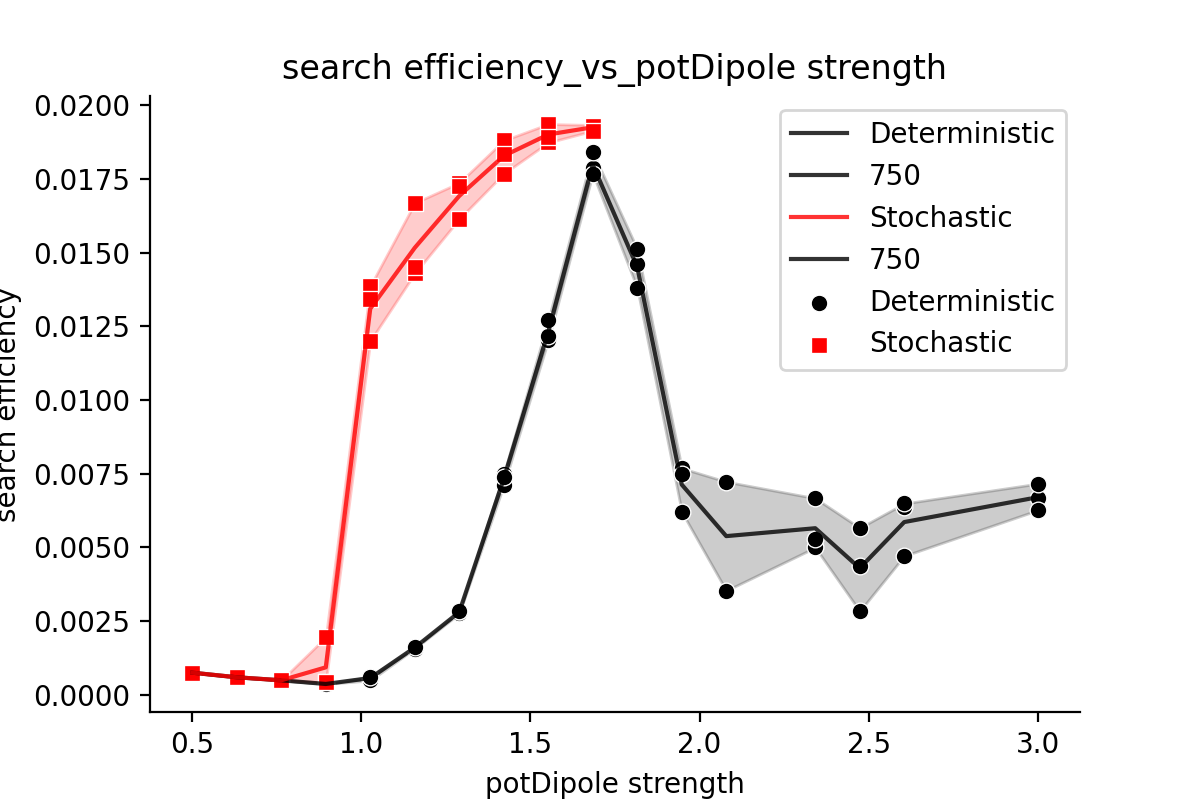

In [46]:
save = True
# y_axis = 'Max locs percent'
y_axis = 'search efficiency'

plt.style.use('default')

note = 'deterministic vs stochastic'
title = y_axis+'_vs_' +parameter
plt.figure(figsize=(6, 4))

ax1 = sns.lineplot(data=df_subset, x= parameter, y= y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'k', alpha =0.8, label = 'Deterministic')

ax2 = sns.scatterplot(data=df_subset, x= parameter, y=y_axis, color = 'k', label = 'Deterministic', marker = 'o')

ax3 = sns.lineplot(data=df_subset_stochastic, x= parameter, y=y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'r', alpha =0.8, label = 'Stochastic')

ax4 = sns.scatterplot(data=df_subset_stochastic, x= parameter, y=y_axis, color = 'r', label = 'Stochastic', marker = 's')

# ax.set_xscale('log')
plt.title(title)

sns.despine(right=True, top=True)

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()